In [328]:
##### IMPORTS #####

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, e
import time

In [40]:
##### O PROBLEMA PARA CARGAS PONTUAIS, DEFININDO O NUMERO DE CARGAS E SUAS POSIÇÕES NO ESPAÇO 2D #####

#pos = np.matrix([0,0],   [0,10],   [0,20], ...,   [0,100]
#                [10,0],  [10,10],  [10,20], ...,  [10,100]
#                                .
#                                . 
#                                . 
#                [100,0], [100,10], [100,20], ..., [100,100]
#                )
# a matriz acima contém como entradas um vetor posição de cada carga. Note que, no caso de uma rede quadrada
# o índice do elemento da matriz corresponde as coordenadas do vetor.

N = 100 #tamanho da matriz (NxN)

pos = np.zeros((N,N,2))

for i, x in zip(range(N), range(0,10*N,10)): #define a largura do eixo y e o espaçamento vertical das cargas
  for j, y in zip(range(N), range(0,10*N,10)): #define a largura do eixo x e o espaçamento horizontal das cargas 
    pos[i,j,0], pos[i,j,1] = x, y #'pinta' as entradas da matriz com o vetor posição de cada carga 

SyntaxError: ignored

In [353]:
##### REMOVENDO CARGAS DAS POSIÇÕES ESCOLHIDAS#####
rem = True

if rem == True:
  for i in range(5,20): #range(a,b): remove as cargas entre a e b no eixo x
    for j in range(18,20): #range(c,d): remove as cargas entre c e d no eixo y
      pos[i,j,0], pos[i,j,1] = 0.5, 0.5
#repetir esse loop caso queira remover cargas em uma região diferente da rede

In [354]:
##### CRIANDO OS ARRAYS X0, Y0 #####
x0 = []
y0 = []

for i in range(N):
  for j in range(N):
    x0.append(pos[j,i,0])
    y0.append(pos[j,i,1])

In [355]:
##### DEFININDO O ARRAY DAS CARGAS HALETO DE ALCALINO #####
q = []

for i in range(int(N/2)):
  iter = 0
  if iter == 0:
    for j in range(int(N/2)):
      q.append(-e)
      q.append(e)
    iter += 1
  if iter == 1:
    for j in range(int(N/2)):
      q.append(e)
      q.append(-e)
    iter -= 1

"""
for i in range(int(N/2)):
  iter = 0
  if iter == 0:
    for j in range(int(N/2)):
      q.append(-e)
      q.append(e)
    iter += 1
  if iter == 1:
    for j in range(int(N/2)):
      q.append(e)
      q.append(-e)
    iter -= 1

É ASSIM QUE SE GERA UM ESPAÇO DE CARGAS ALTERNADAS, VULGO, UM CRISTAL IÔNICO
"""

'\nfor i in range(int(N/2)):\n  iter = 0\n  if iter == 0:\n    for j in range(int(N/2)):\n      q.append(-e)\n      q.append(e)\n    iter += 1\n  if iter == 1:\n    for j in range(int(N/2)):\n      q.append(e)\n      q.append(-e)\n    iter -= 1\n\nÉ ASSIM QUE SE GERA UM ESPAÇO DE CARGAS ALTERNADAS, VULGO, UM CRISTAL IÔNICO\n'

In [357]:
##### TAMBÉM SE TRATANDO DE REMOVER CARGAS #####
for i, j, iter, in zip(x0, y0, range(len(q))):
  if i == 0.5 and j == 0.5:
    x0.pop(iter)
    y0.pop(iter)
    q.pop(iter)

In [358]:
##### ARGUMENTO DA FUNÇÃO #####
carga = [q,
         x0,
         y0]

In [359]:
##### O PROBLEMA PARA CARGAS PONTUAIS, POTENCIAL #####

tempo_inicial = (time.time())

tamanho = 250

def V(x, y, carga):

  ##### definindo as constantes #####
  e0 = epsilon_0

  ##### fazendo as contas #####
  with np.errstate(divide='raise'):
    try:    
      return np.sum(carga[0]/(4 * np.pi * e0 * np.sqrt((x - np.array(carga[1]))**2 + (y - np.array(carga[2]))**2)))
    except FloatingPointError:
      return 0

##### DEFININDO A MATRIZ DE DENSIDADE #####
MV = np.zeros([tamanho,tamanho])

for i in range(tamanho):
  for j in range(tamanho):
    MV[i,j] = V(i,j,carga)

tempo_final = (time.time())

print(f"{tempo_final - tempo_inicial} segundos")

7.471349000930786 segundos


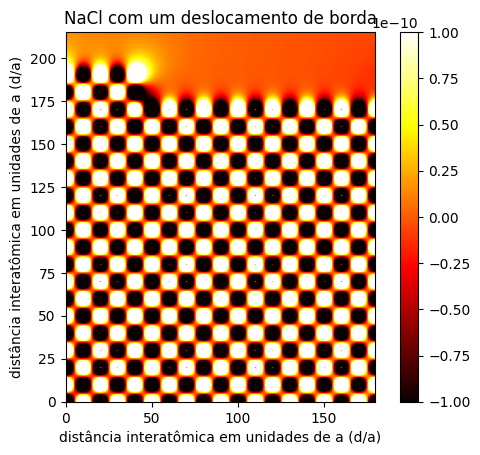

In [363]:
##### PLOTANDO O POTENCIAL #####
intervalo = 1e-10

plt.imshow(MV.T, origin="lower", vmin=-intervalo, vmax=intervalo)

plt.xlabel('distância interatômica em unidades de a (d/a)')
plt.ylabel('distância interatômica em unidades de a (d/a)')

plt.xlim(0,180)
plt.ylim(0,215)

plt.hot()
plt.colorbar()
plt.title("NaCl com um deslocamento de borda")

plt.savefig('potencial-desl-NaCl.pdf', format='pdf')
plt.show()

In [212]:
##### O PROBLEMA PARA CARGAS PONTUAIS, MAGNITUDE DE E #####

##### O CAMPO ELÉTRICO É A DERIVADA DO POTENCIAL, E(x,y) DERIVA O POTENCIAL NUMERICAMENTE PARA O PONTO x, y #####
def E(x,y,carga):
  h = 10e-5
  delx = 1/h*(V(x + h/2,y,carga) - V(x - h/2,y,carga))
  dely = 1/h*(V(x,y + h/2,carga) - V(x,y - h/2,carga))
  return delx, dely

##### mag_E(x,y) CALCULA O MÓDULO DO VETOR NO PONTO x, y #####
def mag_E(x,y,carga):

  E_x, E_y = E(x,y,carga)
  return np.sqrt(E_x**2 + E_y**2)

##### DEFININDO A MATRIZ DE DENSIDADE #####
ME = np.zeros([tamanho,tamanho])

for i in range(tamanho):
  for j in range(tamanho):
    ME[i,j] = mag_E(i,j,carga)

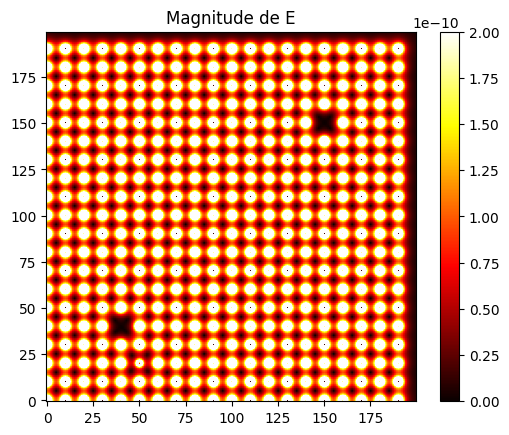

In [213]:
##### PLOTANDO A MAGNITUDE DE E #####
intervalo = 0.2e-9

plt.imshow(ME.T, origin="lower", vmin=0, vmax=intervalo)

plt.hot()
plt.colorbar()
plt.title("Magnitude de E")
plt.show()

In [ ]:
##### O PROBLEMA PARA CARGAS PONTUAIS, DIREÇÃO DE E #####

##### dir_E(x,y) ENCONTRA A DIREÇÃO DO VETOR NO PONTO x, y, FAZENDO A ARCTAN DAS CORDENADAS #####
def dir_E(x,y,carga):
  x_dir, y_dir = E(x,y,carga)
  return np.arctan(y_dir/x_dir)

##### DEFININDO A MATRIZ DE DENSIDADE #####
MD = np.zeros([tamanho,tamanho])

for i in range(tamanho):
  for j in range(tamanho):
    MD[i,j] = dir_E(i,j,carga)

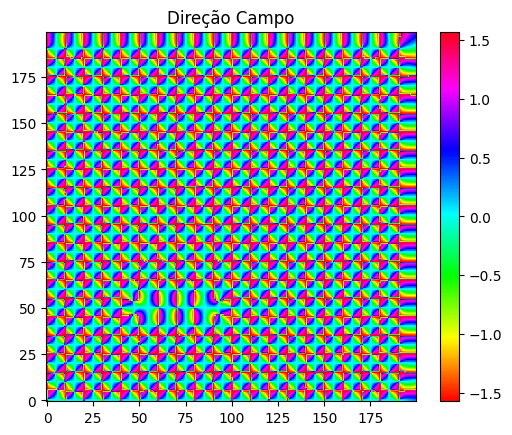

In [ ]:
##### PLOTANDO A DIREÇÃO DO CAMPO #####
intervalo = 1e-10

plt.imshow(MD.T, origin="lower")

plt.hsv()
plt.title("Direção Campo")
plt.colorbar()
plt.show()

In [ ]:
##### TESTE O PROBLEMA PARA CARGAS PONTUAIS, 0 OTIMIZAÇÃO #####

tempo_inicial = (time.time())

def V(x, y, carga):

  ##### definindo as constantes #####
  e0 = epsilon_0

  potencial = 0
  
  for q, x0, y0 in zip(carga[0], carga[1], carga[2]):
    
    if x == x0 and y == y0:
      return 0

    else:
      potencial += q/(4 * np.pi * e0 * np.sqrt((x - x0)**2 + (y - y0)**2))

  return potencial

##### DEFININDO A MATRIZ DE DENSIDADE #####
MV = np.zeros([tamanho,tamanho])

for i in range(tamanho):
  for j in range(tamanho):
    MV[i,j] = V(i,j,carga)

tempo_final = (time.time())

print(f"{tempo_final - tempo_inicial} segundos")

2030.6110365390778 segundos


In [ ]:
##### TESTE O PROBLEMA PARA CARGAS PONTUAIS, OTIMIZAÇÃO 1 #####

tempo_inicial = (time.time())

def V(x, y, carga):

  ##### definindo as constantes #####
  e0 = epsilon_0

  potencial = np.array([])
  
  for x0, y0 in zip(carga[1], carga[2]):
    
    if x == x0 and y == y0:
      return 0

    
  potencial = np.array(carga[0])/(4 * np.pi * e0 * np.sqrt((x - np.array(carga[1]))**2 + (y - np.array(carga[2]))**2))

  return np.sum(potencial)

##### DEFININDO A MATRIZ DE DENSIDADE #####
MV = np.zeros([tamanho,tamanho])

for i in range(tamanho):
  for j in range(tamanho):
    MV[i,j] = V(i,j,carga)

tempo_final = (time.time())

print(f"{tempo_final - tempo_inicial} segundos")

586.8436403274536 segundos
